## **1. Problema de Negócio**

**1.1 Empresa:** House Rocket.

**1.2 O que a empresa faz:** a House Rocket é uma plataforma de compra e venda de imóveis.

**1.3 Qual o problema?** O CEO da empresa gostaria de maximizar os lucros encontrando bons negócios.

**1.4 Qual a principal estratégia?** Fontes externas para encontrar bons negócios.

**1.5 As necessidades do CEO da House Rocket:**
1. Quantos imóveis possuem o número máximo de andares?
2. Criar uma classificação para os imóveis, separando-os em alto e baixo padrão, de acordo com o preço.
> *Acima de 540.000 = Alto Padrão | Abaixo de 540.000 = Baixo Padrão.*
3. Criar um relatório, ordenado pelo preço, contendo as seguintes informações:
> *id do imóvel || data que o imóvel ficou disponível para compra || número de quartos || tamanho total do terreno || preço || classificação do imóvel (baixo ou alto padrão).*
4. Criar um mapa indicando a localização geográfica dos imóveis.

**1.6 Exercícios:**
1. Crie uma nova coluna chamada: "property_age".
	- Se o valor da coluna “date” for maior que 2014-01-01 => "new_property"
	- Se o valor da coluna “date” for menor que 2014-01-01 => "old_property"
2. Crie uma nova coluna chamada: "dormitory_type".
	- Se o valor da coluna “bedrooms” for igual a 1 => "studio"
	- Se o valor da coluna “bedrooms” for igual a 2 => "apartment"
	- Se o valor da coluna “bedrooms” for maior que 2 => "house"
3. Crie uma nova coluna chamada: "condition_type".
	- Se o valor da coluna "condition" for menor ou igual a 2 => "bad"
	- Se o valor da coluna "condition" for igual a 3 ou 4 => "regular"
	- Se o valor da coluna "condition" for igual a 5 => "good"
4. Modifique o TIPO da coluna "condition" para STRING.
5. Delete as colunas: "sqft_living15" e "sqft_lot15".
6. Modifique o TIPO da coluna "yr_built" para DATE.
7. Modifique o TIPO da coluna "yr_renovated" para DATE.
8. Qual a data mais antiga de construção de um imóvel?
9. Qual a data mais antiga de renovação de um imóvel?
10. Quantos imóveis tem 2 andares?
11. Quantos imóveis estão com a condição igual a "regular"?
12. Quantos imóveis estão com a condição igual a "bad" e possuem "vista para a água"?
13. Quantos imóveis estão com a condição igual a "good" e são "new_property"?
14. Qual o valor do imóvel mais caro do tipo "studio"?
15. Quantos imóveis do tipo "apartment" foram reformados em 2015?
16. Qual o maior número de quartos que um imóvel do tipo "house" possui?
17. Quantos imóveis "new_property" foram reformados no ano de 2014?
18. Selecione as colunas "id", "date", "price", "floors" e "zipcode" pelo método:
	1. Direto pelo nome das colunas
	2. Pelos índices
	3. Pelos índices das linhas e o nome das colunas
	4. Pelos índices booleanos
19. Salve um arquivo .csv com somente as colunas do item 18.
20. Modifique a cor dos pontos no mapa para "verde-escuro".

## **2. Planejamento da Solução**

**2.1 Planejamento do PRODUTO FINAL:**

a. O que eu vou entregar? (Planilha, Texto, E-mail, Modelo de ML, etc.)
- Resposta - O CEO receberá um e-mail com 2 anexos.

b. Como vai ser a entrega?
- Corpo do e-mail:
  - Texto com perguntas e respostas.
- Anexos:
  - O relatório em CSV;
  - A foto do mapa em HTML.

**2.2 Planejamento do PROCESSO:**

a. Onde estão os dados? (Excel, CSV, JSON, TXT, SGBD, API, etc.)
- Resposta - [House Sales in King County, USA | Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction).

b. Como coletar os dados? (Download manual, SQL, Python, Streamlit, etc.)
- Resposta - Fazendo o download manual do dataset.

**2.3 Planejamento das FERRAMENTAS:**

a. Identificar quais ferramentas podem ser utilizadas?
- Resposta - Excel, Python, etc.

b. Escolher as ferramentas que serão utilizadas?
- Resposta - Python e Jupyter Notebook.

## **3. Atendendo as necessidades de Negócio com Python e Jupyter Notebook.**

Importando bibliotecas necessárias:

In [1]:
import numpy as np
import pandas as pd

Acessando o dataset:

In [2]:
df = pd.read_csv("../data/kc_house_data.csv")

Visualizando o cabeçalho do dataset:

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Visualizando o rodapé do dataset:

In [4]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


Visualizando a lista de colunas do dataset:

In [6]:
df.columns.to_list()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

Visualizando os tipos das colunas do dataset:

In [9]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## **4. As necessidades do CEO da House Rocket:**

### 1. Quantos imóveis possuem o número máximo de andares?
  - Resposta - Contar linhas do dataset onde o atributo "floors" seja igual ao valor máximo do próprio atributo.

In [10]:
df[(df["floors"] == df["floors"].max())].shape[0]

8

### 2. Criar uma classificação para os imóveis, classificando-os em alto e baixo padrão, de acordo com o preço.
> *Acima de 540.000 = Alto Padrão | Abaixo de 540.000 = Baixo Padrão.*
- Resposta - Criar um novo atributo no dataset chamado "standard". Para cada linha do dataset, comparar o atributo "price". Se o valor for MAIOR que 540.000 escrever "high_standard" no novo atributo "standard". Se o valor for MENOR que 540.000 escrever "low_standard" no novo atributo "standard".

In [85]:
df["standard"] = np.where(df["price"] > 540000, "high_standard", "low_standard")

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,standard
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,low_standard
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,low_standard
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,low_standard
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,high_standard
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,low_standard


### 3. Criar um relatório, ordenado pelo preço, contendo as seguintes informações:
> *id do imóvel || data que o imóvel ficou disponível para compra || número de quartos || tamanho total do terreno || preço || classificação do imóvel (baixo ou alto padrão).*
- Resposta - Selecionar os atributos solicitados ou excluir os atributos não solicitados, criando um arquivo *.CSV.

In [121]:
report = df[["id", "date", "bedrooms", "sqft_lot", "price", "standard"]].sort_values(
    "price", ascending=False
)

report.to_csv("../files/report1.csv", index = False)

### 4.1 Criar um mapa indicando a localização geográfica dos imóveis, utilizando a lib Plotly Express.
- Resposta - Procurar no Python alguma biblioteca que contenha uma função que desenha mapas e aprender a utilizar essa função.

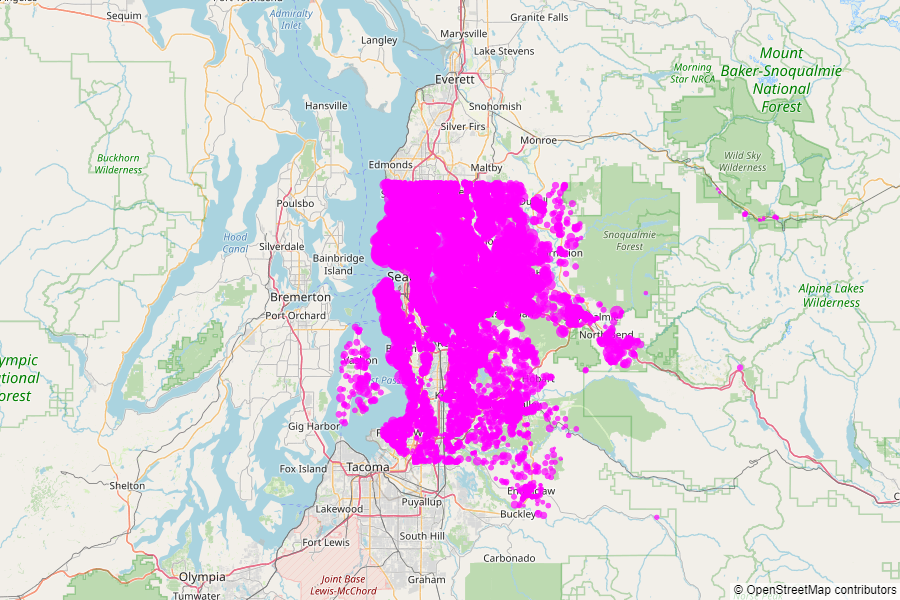

In [5]:
import plotly.express as px

data = df[["id", "lat", "long", "price"]]

map = px.scatter_mapbox(
    data,
    lat="lat",
    lon="long",
    hover_name="id",
    hover_data=["price"],
    size="price",
    size_max=20,
    color_discrete_sequence=["fuchsia"],
    zoom=8,
    height=300,
)

map.update_layout(
    mapbox_style="open-street-map", height=600, margin={"r": 0, "t": 0, "l": 0, "b": 0}
)

map.show(renderer="png", width=900, height=600)

# map.write_html("../files/kc_house_data_map_plotly1.html")

<a href="https://rfsampaio.github.io/docs/kc_house_data_map_plotly1.html" target="_blank"><b><i>Obs.:</i></b><i> link para o mapa interativo.</i></a>

### 4.2 Criar um mapa indicando a localização geográfica dos imóveis, utilizando a lib Folium.
- Resposta - Procurar no Python alguma biblioteca que contenha uma função que desenha mapas e aprender a utilizar essa função.

In [10]:
if False:
    import folium

    map = folium.Map(location=[47.606925251276, -122.33520611373727], zoom_start=9)

    df.loc[:, ["id", "lat", "long", "price", "zipcode"]].apply(
        lambda row: folium.Circle(
            location=[row["lat"], row["long"]],
            tooltip="<b>Id:</b> " + str(row["id"]),
            popup="<b>Id:</b> "
            + str(row["id"])
            + "<br><b>Price:</b> "
            + str(row["price"])
            + "<br><b>Zipcode:</b> "
            + str(row["zipcode"]),
            radius=row["price"] / 55000,
            color="crimson",
            fill=True,
            fill_color="crimson",
        ).add_to(map),
        axis=1,
    )

    map

    map.save("../files/kc_house_data_map_folium.html")

## **5. Exercícios:**

### 1. Crie uma nova coluna chamada: "property_age".
> Se o valor da coluna “date” for maior que 2014-01-01 => "new_property"  
> Se o valor da coluna “date” for menor que 2014-01-01 => "old_property"
- Resposta - Criar um novo atributo no dataset chamado "property_age". Para cada linha do dataset, comparar o atributo "date". Se o valor for MAIOR que "2014-01-01" escrever "new_property". Se o valor for MENOR que "2014-01-01" escrever "old_property".

In [86]:
df["date"] = pd.to_datetime(df["date"])

df["property_age"] = np.where(
    df["date"] > pd.to_datetime("2014-01-01"), "new_property", "old_property"
)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,standard,property_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,low_standard,new_property
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,low_standard,new_property
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,low_standard,new_property
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,high_standard,new_property
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,low_standard,new_property


In [ ]:
# df[['id','date','property_age']][df['property_age'] == 'new_property']
# df[['id','date','property_age']][df['property_age'] == 'old_property']

### 2. Crie uma nova coluna chamada: "dormitory_type".
> Se o valor da coluna “bedrooms” for igual a 1 => "studio"  
> Se o valor da coluna “bedrooms” for igual a 2 => "apartment"  
> Se o valor da coluna “bedrooms” for maior que 2 => "house"
- Resposta - Criar um novo atributo no dataset chamado "dormitory_type". Para cada linha do dataset, comparar o atributo "bedrooms". Se o valor for IGUAL a 1 escrever "studio". Se o valor for IGUAL a 2 escrever "apartament". Se o valor for MAIOR que 2 escrever "house".

In [87]:
conditions = [(df["bedrooms"] == 1), (df["bedrooms"] == 2), (df["bedrooms"] > 2)]

values = ["studio", "apartment", "house"]

df["dormitory_type"] = np.select(conditions, values)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,standard,property_age,dormitory_type
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,low_standard,new_property,house
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,low_standard,new_property,house
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,low_standard,new_property,apartment
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,high_standard,new_property,house
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,low_standard,new_property,house


### 3. Crie uma nova coluna chamada: "condition_type".
> Se o valor da coluna "condition" for menor ou igual a 2 => "bad"  
> Se o valor da coluna "condition" for igual a 3 ou 4 => "regular"  
> Se o valor da coluna "condition" for igual a 5 => "good"
- Resposta - Criar um novo atributo no dataset chamado "condition_type". Para cada linha do dataset, comparar o atributo "condition_type". Se o valor for MENOR OU IGUAL a 2 escrever "bad". Se o valor for IGUAL a 3 ou 4 escrever "regular". Se o valor for IGUAL a 5 escrever "good".

In [88]:
conditions = [
    (df["condition"] <= 2),
    (df["condition"] == 3) | (df["condition"] == 4),
    (df["condition"] == 5),
]

values = ["bad", "regular", "good"]

df["condition_type"] = np.select(conditions, values)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,standard,property_age,dormitory_type,condition_type
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,low_standard,new_property,house,regular
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,low_standard,new_property,house,regular
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,low_standard,new_property,apartment,regular
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,high_standard,new_property,house,good
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,low_standard,new_property,house,regular


### 4. Modifique o TIPO da coluna "condition" para STRING.
- Resposta - Modificar o tipo do atributo "condition" para string.

In [89]:
df["condition"] = df["condition"].astype(str)

df.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                 object
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
standard                  object
property_age              object
dormitory_type            object
condition_type            object
dtype: object

### 5. Delete as colunas: "sqft_living15" e "sqft_lot15".
- Resposta - Excluir do dataset os atributos "sqft_living15" e "sqft_lot15".

In [90]:
columns = ["sqft_living15", "sqft_lot15"]

df.drop(columns, inplace=True, axis=1)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,standard,property_age,dormitory_type,condition_type
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,low_standard,new_property,house,regular
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,low_standard,new_property,house,regular
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,low_standard,new_property,apartment,regular
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,high_standard,new_property,house,good
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,low_standard,new_property,house,regular


### 6. Modifique o TIPO da coluna "yr_built" para DATE.
- Resposta - Modificar o tipo do atributo "yr_built" para date.

In [91]:
df["yr_built"] = pd.to_datetime(df["yr_built"], format="%Y")

df.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                 object
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built          datetime64[ns]
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
standard                  object
property_age              object
dormitory_type            object
condition_type            object
dtype: object

### 7. Modifique o TIPO da coluna "yr_renovated" para DATE.
- Resposta - Modificar o tipo do atributo "yr_renovated" para date.

In [92]:
df["yr_renovated"] = pd.to_datetime(df["yr_renovated"], format="%Y", errors="coerce")

df.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                 object
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built          datetime64[ns]
yr_renovated      datetime64[ns]
zipcode                    int64
lat                      float64
long                     float64
standard                  object
property_age              object
dormitory_type            object
condition_type            object
dtype: object

### 8. Qual a data mais antiga de construção de um imóvel?
- Resposta - Obter o valor mínimo do atributo "yr_built".

In [94]:
df["yr_built"].min().strftime("%d/%m/%Y")

'01/01/1900'

### 9. Qual a data mais antiga de renovação de um imóvel?
- Resposta - Obter o valor mínimo do atributo "yr_renovated", excluindo os valores zerados.

In [95]:
df["yr_renovated"].loc[df["yr_renovated"] != 0].min().strftime("%d/%m/%Y")

'01/01/1934'

### 10. Quantos imóveis tem 2 andares?
- Resposta - Contar linhas do dataset onde o atributo "floors" seja igual a 2.

In [96]:
df.loc[df["floors"] == 2].shape[0]

8241

### 11. Quantos imóveis estão com a condição igual a "regular"?
- Resposta - Contar linhas do dataset onde o atributo "condition_type" seja igual a "regular".

In [99]:
df.loc[df["condition_type"] == "regular"].shape[0]

19710

### 12. Quantos imóveis estão com a condição igual a "bad" e possuem "vista para a água"?
- Resposta - Contar linhas do dataset onde o atributo "condition_type" seja igual a "bad" e o atributo "waterfront" seja diferente de 0.

In [98]:
df.loc[(df["condition_type"] == "bad") & (df["waterfront"] != 0)].shape[0]

2

### 13. Quantos imóveis estão com a condição igual a "good" e são "new_property"?
- Resposta - Contar linhas do dataset onde o atributo "condition_type" seja igual a "good" e o atributo "property_age" seja igual a "new_property".

In [100]:
df.loc[(df["condition_type"] == "good") & (df["property_age"] == "new_property")].shape[0]

1701

### 14. Qual o valor do imóvel mais caro do tipo "studio"?
- Resposta - Obter as linhas do dataset onde o atributo "dormitory_type" seja igual a "studio" e depois obter o valor máximo da coluna "price".

In [101]:
df["price"].loc[df["dormitory_type"] == "studio"].max()

1247000.0

### 15. Quantos imóveis do tipo "apartment" foram reformados em 2015?
- Resposta - Contar linhas do dataset onde o atributo "dormitory_type" seja igual a "apartment" e o atributo "yr_renovated" seja igual a "2015-01-01".

In [105]:
df.loc[(df["dormitory_type"] == "apartment") & (df["yr_renovated"] == "2015-01-01")].shape[0]

0

### 16. Qual o maior número de quartos que um imóvel do tipo "house" possui?
- Resposta - Obter as linhas do dataset onde o atributo "dormitory_type" seja igual a "house" e depois obter o valor máximo da coluna "bedrooms".

In [106]:
df["bedrooms"].loc[df["dormitory_type"] == "house"].max()

33

### 17. Quantos imóveis "new_property" foram reformados no ano de 2014?
- Resposta - Contar linhas do dataset onde o atributo "property_age" seja igual a "new_property" e o atributo "yr_renovated" seja igual a "2014-01-01".

In [107]:
df.loc[(df["property_age"] == "new_property") & (df["yr_renovated"] == "2014-01-01")].shape[0]

91

### 18. Selecione as colunas "id", "date", "price", "floors" e "zipcode" pelo método:
> a. Direto pelo nome das colunas  
> b. Pelos índices  
> c. Pelos índices das linhas e o nome das colunas  
> d. Pelos índices booleanos

In [110]:
# a. Direto pelo nome das colunas
df[["id", "date", "price", "floors", "zipcode"]]

,id,date,price,floors,zipcode
0,7129300520,2014-10-13,221900.0,1.0,98178
1,6414100192,2014-12-09,538000.0,2.0,98125
2,5631500400,2015-02-25,180000.0,1.0,98028
3,2487200875,2014-12-09,604000.0,1.0,98136
4,1954400510,2015-02-18,510000.0,1.0,98074
...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3.0,98103
21609,6600060120,2015-02-23,400000.0,2.0,98146
21610,1523300141,2014-06-23,402101.0,2.0,98144
21611,291310100,2015-01-16,400000.0,2.0,98027


In [113]:
# b. Pelos índices
df.iloc[:, [0, 1, 2, 7, 16]]

,id,date,price,floors,zipcode
0,7129300520,2014-10-13,221900.0,1.0,98178
1,6414100192,2014-12-09,538000.0,2.0,98125
2,5631500400,2015-02-25,180000.0,1.0,98028
3,2487200875,2014-12-09,604000.0,1.0,98136
4,1954400510,2015-02-18,510000.0,1.0,98074
...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3.0,98103
21609,6600060120,2015-02-23,400000.0,2.0,98146
21610,1523300141,2014-06-23,402101.0,2.0,98144
21611,291310100,2015-01-16,400000.0,2.0,98027


In [115]:
# c. Pelos índices das linhas e o nome das colunas
df.loc[:, ["id", "date", "price", "floors", "zipcode"]]

,id,date,price,floors,zipcode
0,7129300520,2014-10-13,221900.0,1.0,98178
1,6414100192,2014-12-09,538000.0,2.0,98125
2,5631500400,2015-02-25,180000.0,1.0,98028
3,2487200875,2014-12-09,604000.0,1.0,98136
4,1954400510,2015-02-18,510000.0,1.0,98074
...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3.0,98103
21609,6600060120,2015-02-23,400000.0,2.0,98146
21610,1523300141,2014-06-23,402101.0,2.0,98144
21611,291310100,2015-01-16,400000.0,2.0,98027


In [118]:
# d. Pelos índices booleanos
cols = [
    True,
    True,
    True,
    False,
    False,
    False,
    False,
    True,
    False,
    False,
    False,
    False,
    False,
    False,
    False,
    False,
    True,
    False,
    False,
    False,
    False,
    False,
    False,
]
df.loc[:, cols]

,id,date,price,floors,zipcode
0,7129300520,2014-10-13,221900.0,1.0,98178
1,6414100192,2014-12-09,538000.0,2.0,98125
2,5631500400,2015-02-25,180000.0,1.0,98028
3,2487200875,2014-12-09,604000.0,1.0,98136
4,1954400510,2015-02-18,510000.0,1.0,98074
...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3.0,98103
21609,6600060120,2015-02-23,400000.0,2.0,98146
21610,1523300141,2014-06-23,402101.0,2.0,98144
21611,291310100,2015-01-16,400000.0,2.0,98027


### 19. Salve um arquivo .CSV com somente as colunas do item 18.
- Resposta - Selecionar os atributos solicitados ou excluir os atributos não solicitados, criando um arquivo *.CSV.

In [120]:
report = df[["id", "date", "price", "floors", "zipcode"]].sort_values(
    "price", ascending=False
)

report.to_csv("../files/report2.csv", index = False)

### 20. Modifique a cor dos pontos no mapa para "verde-escuro".

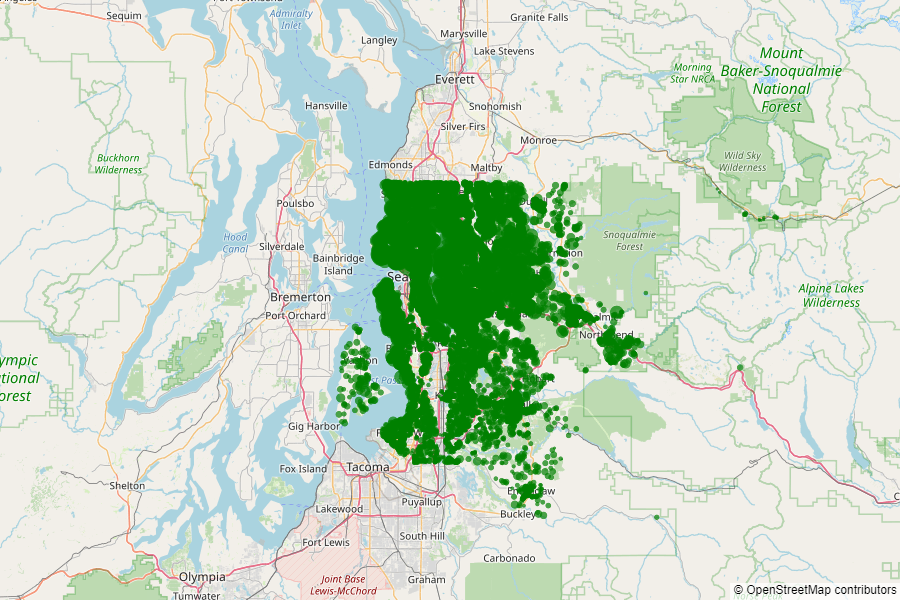

In [16]:
import plotly.express as px

data = df[["id", "lat", "long", "price"]]

map = px.scatter_mapbox(
    data,
    lat="lat",
    lon="long",
    hover_name="id",
    hover_data=["price"],
    size="price",
    size_max=20,
    color_discrete_sequence=["green"],
    zoom=8,
    height=300,
)

map.update_layout(
    mapbox_style="open-street-map", height=600, margin={"r": 0, "t": 0, "l": 0, "b": 0}
)

map.show(renderer="png", width=900, height=600)

# map.write_html("../files/kc_house_data_map_plotly2.html")

<a href="https://rfsampaio.github.io/docs/kc_house_data_map_plotly2.html" target="_blank"><b><i>Obs.:</i></b><i> link para o mapa interativo.</i></a>